<a href="https://colab.research.google.com/github/GabeMaldonado/JupyterNotebooks/blob/master/Pytorch_Foundations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes on Pytorch Foundations

## Tensor
 Tensor is the central unit of data in Pytorch. It consists of a set of primitive values shaped into an **n-dimensional**  array. Every tensor has a number of dimensions and the number of elements in each dimension gives us the shape of the tensor. 

 *   **Scalar** is a 0-Dimensional tensor (0-D)
 *   **Vector** is a 1-D tensor, e.g. [2, 4, 6, 8, 10]
 *   **Matrix** is a 2-D tensor, e.g. [ [1, 3, 5], [2, 4, 6] ]  
 *   **N-Dimensional** matrices are N-D tensor, e.g. [ [ [1 ,2], [3, 4], [5, 6], [ [7, 8], [9, 10], [11, 12] ] ]

 Pytorch Tensors are similar to numpy arrays but they have been architectured to make optimal use of GPUs for massive parallel computations. 



In [1]:
# Install pytorch

!pip3 install torch torchvision

In [2]:
import torch

# Check pytorch version
print(torch.__version__)



1.4.0


In [3]:
# check default pytorch datatype

torch.get_default_dtype()

torch.float32

We can see that the default d-type is ```float32``` however, we can change the default to other datatypes as long as they are floating-points. Pytorch will not accept int as the default d-type.

[Check docs for more info](https://pytorch.org/docs/stable/tensors.html)

In [4]:
# chage default d-type

torch.set_default_dtype(torch.float32)
torch.get_default_dtype()

torch.float32

In [5]:
# Create a Pytorch Tensor

tensor_array = torch.Tensor([[1, 2, 3], [4, 5, 6]])
tensor_array

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [6]:
torch.is_tensor(tensor_array)

True

In [7]:
# Check the number of elements in the tensor
# numel would print the number of elements regarding of the tensor's shape
 
torch.numel(tensor_array)

6

In [0]:
tensor_uninitialized = torch.Tensor(2,2)


In [9]:
tensor_uninitialized

tensor([[3.5377e-35, 0.0000e+00],
        [8.4078e-45, 0.0000e+00]])

The two lines of code above show that when we run ```torch.Tensor(2, 2)``` we create a 2X2 tensor that has not initial values. Pytorch creates the tensor and allocates memory for future values that will be passed to the tensor. The numbers we see are memory addresses. 
However, if we run ```torch.rand(2, 2)``` we are creating a 2X2 tensor that it is initialized with random values:

In [0]:
tensor_initialized = torch.rand(2, 2)

In [11]:
tensor_initialized

tensor([[0.5521, 0.3260],
        [0.2627, 0.0585]])

In [0]:
# Create a tensor of a particular type (int)

tensor_init = torch.Tensor([5, 3]).type(torch.IntTensor)

In [13]:
tensor_init

tensor([5, 3], dtype=torch.int32)

In [14]:
# Create a tensor of int16 d-type

tensor_short = torch.ShortTensor([1, 2, 3])
tensor_short

tensor([1, 2, 3], dtype=torch.int16)

In [15]:
# Create a tensor of half float d-type

tensor_float = torch.tensor([1, 2, 3]).type(torch.half)
tensor_float

tensor([1., 2., 3.], dtype=torch.float16)

In [0]:
# Create a tensor and fill it with a default value

tensor_fill = torch.full((2, 4), fill_value=10)

In [17]:
tensor_fill

tensor([[10., 10., 10., 10.],
        [10., 10., 10., 10.]])

In [0]:
# Create a tensor filled with ones

tensor_of_ones = torch.ones([2, 4], dtype=torch.int32)


In [19]:
tensor_of_ones

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1]], dtype=torch.int32)

In [20]:
# Create a tensor of zeros by passing the already created tensor of ones

tensor_of_zeros = torch.zeros_like(tensor_of_ones)
tensor_of_zeros

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)

In [21]:
# Create a 2-D matrix filled with ones diagonally

tensor_eye = torch.eye(5)
tensor_eye

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [22]:
# Get the indices of the non-zero values on the tensor above

non_zero = torch.nonzero(tensor_eye)
non_zero

tensor([[0, 0],
        [1, 1],
        [2, 2],
        [3, 3],
        [4, 4]])

## Operations on Tensors

In [23]:
# Create a 2X3 tensor with random values

initial_tensor = torch.rand(2, 3)
initial_tensor

tensor([[0.8851, 0.7137, 0.2390],
        [0.0549, 0.0529, 0.1606]])

In [24]:
# Perform an inplace fill (_) operation
# 
initial_tensor.fill_(10)
initial_tensor

tensor([[10., 10., 10.],
        [10., 10., 10.]])

In [25]:
# Add a value to the tensor

new_tensor = initial_tensor.add(5)
new_tensor

tensor([[15., 15., 15.],
        [15., 15., 15.]])

In [26]:
# Perform a inplace square root on the new tensor

new_tensor.sqrt_()
new_tensor

tensor([[3.8730, 3.8730, 3.8730],
        [3.8730, 3.8730, 3.8730]])

In [27]:
# Create a torch containing evenly spaced numbers from 1 - 12

x = torch.linspace(start=0.1, end=10.0, steps=15)
x

tensor([ 0.1000,  0.8071,  1.5143,  2.2214,  2.9286,  3.6357,  4.3429,  5.0500,
         5.7571,  6.4643,  7.1714,  7.8786,  8.5857,  9.2929, 10.0000])

In [28]:
x.size()

torch.Size([15])

In [29]:
# Chunck x into 3 separate parts

tensor_chunk = torch.chunk(x, 3, 0)
tensor_chunk

(tensor([0.1000, 0.8071, 1.5143, 2.2214, 2.9286]),
 tensor([3.6357, 4.3429, 5.0500, 5.7571, 6.4643]),
 tensor([ 7.1714,  7.8786,  8.5857,  9.2929, 10.0000]))

In [30]:
# Concatenate tensors

tensor1 = tensor_chunk[0]
tensor2 = tensor_chunk[1]
tensor3 = torch.tensor([3.0, 4.0, 5.0])

torch.cat((tensor1, tensor2, tensor3), 0)

tensor([0.1000, 0.8071, 1.5143, 2.2214, 2.9286, 3.6357, 4.3429, 5.0500, 5.7571,
        6.4643, 3.0000, 4.0000, 5.0000])

In [31]:
# Create a 3X3 tensor with radon numbers

random_tensor = torch.rand(3,3)
random_tensor

tensor([[0.1804, 0.6054, 0.6588],
        [0.4810, 0.1374, 0.9261],
        [0.1096, 0.2100, 0.1969]])

In [32]:
# Get values from the tensor by index

random_tensor[0, 1]

tensor(0.6054)

In [33]:
# Slice the tensor
random_tensor[1:, 1:]

tensor([[0.1374, 0.9261],
        [0.2100, 0.1969]])

In [34]:
# Get size of tensor

random_tensor.size()

torch.Size([3, 3])

In [35]:
# View the tensor as a 1-D tensor with 9 elements (3*3)

resized_tensor = random_tensor.view(9)
resized_tensor

tensor([0.1804, 0.6054, 0.6588, 0.4810, 0.1374, 0.9261, 0.1096, 0.2100, 0.1969])

In [36]:
# note * resized tensor and original tensor have the same memory address so 
# a change to the original tensor would be reflected in the copy tensor

random_tensor[2,2] = 10.0
resized_tensor

tensor([ 0.1804,  0.6054,  0.6588,  0.4810,  0.1374,  0.9261,  0.1096,  0.2100,
        10.0000])

In [37]:
random_tensor

tensor([[ 0.1804,  0.6054,  0.6588],
        [ 0.4810,  0.1374,  0.9261],
        [ 0.1096,  0.2100, 10.0000]])

In [38]:
random_tensor.shape

torch.Size([3, 3])

In [39]:
# Change shape of a tensor by squeezing and unsqueezing

tensor_unsqueeze = torch.unsqueeze(random_tensor, 2)
tensor_unsqueeze

tensor([[[ 0.1804],
         [ 0.6054],
         [ 0.6588]],

        [[ 0.4810],
         [ 0.1374],
         [ 0.9261]],

        [[ 0.1096],
         [ 0.2100],
         [10.0000]]])

In [40]:
tensor_unsqueeze.shape

torch.Size([3, 3, 1])

In [41]:
initial_tensor

tensor([[10., 10., 10.],
        [10., 10., 10.]])

In [42]:
# Transpose tensor

tensor_transpose = torch.transpose(initial_tensor, 0, 1)
tensor_transpose

tensor([[10., 10.],
        [10., 10.],
        [10., 10.]])

In [43]:
# Sort values in tensor

sorted_tensor, sorted_indices = torch.sort(random_tensor)
sorted_tensor

tensor([[ 0.1804,  0.6054,  0.6588],
        [ 0.1374,  0.4810,  0.9261],
        [ 0.1096,  0.2100, 10.0000]])

In [44]:
sorted_indices

tensor([[0, 1, 2],
        [1, 0, 2],
        [0, 1, 2]])

In [45]:
# Create a 1-D float tensor 

tensor_float = torch.FloatTensor([-1.1, -2.2, 3.3])
tensor_float

tensor([-1.1000, -2.2000,  3.3000])

In [46]:
# Get the absolute values of the tensor

tensor_abs = torch.abs(tensor_float)
tensor_abs

tensor([1.1000, 2.2000, 3.3000])

In [0]:
# Create two tensors with random values

rand1 = torch.abs(torch.rand(2, 3))
rand2 = torch.abs(torch.rand(2, 3))

In [48]:
rand1

tensor([[0.6688, 0.2732, 0.6260],
        [0.7696, 0.1880, 0.3173]])

In [49]:
rand2

tensor([[0.1969, 0.4801, 0.5976],
        [0.5697, 0.6583, 0.8709]])

In [50]:
# Add the two tensors

add1 = rand1 + rand2
add1

tensor([[0.8656, 0.7533, 1.2237],
        [1.3393, 0.8463, 1.1881]])

In [51]:
# Create another tensor with + and - values

tensor = torch.Tensor([[-1, -2, -3], [1, 2, 3]])
tensor

tensor([[-1., -2., -3.],
        [ 1.,  2.,  3.]])

In [52]:
# Perform tensor-wise division
tensor_div = torch.div(tensor, tensor + 0.3)
tensor_div

tensor([[1.4286, 1.1765, 1.1111],
        [0.7692, 0.8696, 0.9091]])

In [53]:
# Clamp tensor to certain min and max values

tensor_clamp = torch.clamp(tensor, min=-0.2, max=2)
tensor_clamp

tensor([[-0.2000, -0.2000, -0.2000],
        [ 1.0000,  2.0000,  2.0000]])

In [0]:
# Create two new tensors

t1 = torch.Tensor([1, 2])
t2 = torch.Tensor([10, 20])

In [55]:
# Perform matrix multiplication on the two tensors above
# using dot product

dot_product = torch.dot(t1, t2)
dot_product

tensor(50.)

In [0]:
# Create a matrix and a vector

matrix = torch.Tensor([[1, 2, 3],
                       [4, 5, 6]])

vector = torch.Tensor([0, 1, 2])

In [57]:
# In Pytorch we can also multiply a matrix and a vector

matrix_vector = torch.mv(matrix, vector)
matrix_vector

tensor([ 8., 17.])

In [0]:
# Create another matrix

matrix_2 = torch.Tensor([[10, 30],
                         [20, 0],
                         [0, 50]])

In [59]:
# Perform matrix multiuplication (mm)

matrix_mul = torch.mm(matrix, matrix_2)
matrix_mul

tensor([[ 50., 180.],
        [140., 420.]])

In [60]:
# Get the index of the max value across a particular dimension

torch.argmax(matrix_mul, dim=1)

tensor([1, 1])

In [61]:
matrix_mul[1,1]

tensor(420.)

In [62]:
# Get the index of the min value

torch.argmin(matrix_mul, dim=1)

tensor([0, 0])

In [63]:
matrix_mul[0,0]

tensor(50.)

## Conversions between Pytorch and Numpy 

In [0]:
import numpy as np

In [65]:
# Create a new tensor with random values

tensor = torch.rand(4, 3)
tensor

tensor([[0.4104, 0.4827, 0.5824],
        [0.5948, 0.8272, 0.8067],
        [0.2073, 0.0654, 0.7156],
        [0.2299, 0.3968, 0.7596]])

In [66]:
# check type

type(tensor)



torch.Tensor

In [67]:
# Convert tensor to a numpy array

numpy_from_tensor = tensor.numpy()
numpy_from_tensor

array([[0.4104271 , 0.48272985, 0.58242667],
       [0.59482265, 0.82721066, 0.80672765],
       [0.2073437 , 0.06537104, 0.71558857],
       [0.22989696, 0.3968014 , 0.7596284 ]], dtype=float32)

In [68]:
# check type

type(numpy_from_tensor)

numpy.ndarray

In [69]:
# check if it is a tensor

torch.is_tensor(tensor)

True

In [70]:
# try same but with the np array

torch.is_tensor(numpy_from_tensor)

False

The Pytorch tensor and the numpy array share the same memory address so the changes made to one would be reflected on the other.

In [71]:
numpy_from_tensor[0, 0] = 100.0

numpy_from_tensor

array([[1.0000000e+02, 4.8272985e-01, 5.8242667e-01],
       [5.9482265e-01, 8.2721066e-01, 8.0672765e-01],
       [2.0734370e-01, 6.5371037e-02, 7.1558857e-01],
       [2.2989696e-01, 3.9680141e-01, 7.5962842e-01]], dtype=float32)

In [72]:
tensor

tensor([[1.0000e+02, 4.8273e-01, 5.8243e-01],
        [5.9482e-01, 8.2721e-01, 8.0673e-01],
        [2.0734e-01, 6.5371e-02, 7.1559e-01],
        [2.2990e-01, 3.9680e-01, 7.5963e-01]])

In [73]:
# Instantiate a numpy array

numpy_arr = np.array([[1.0, 2.0, 3.0],
                      [10.0, 20.0, 30.0,],
                      [100.0, 200.0, 300.0]])
numpy_arr

array([[  1.,   2.,   3.],
       [ 10.,  20.,  30.],
       [100., 200., 300.]])

In [74]:
# Convert the np array to a tensor

tensor_from_np = torch.from_numpy(numpy_arr)
tensor_from_np

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]], dtype=torch.float64)

In [75]:
# Check type

type(tensor_from_np)

torch.Tensor

In [76]:
torch.is_tensor(tensor_from_np)

True

In [77]:
# Change values in the tensor

tensor_from_np[0] = 1
tensor_from_np

tensor([[  1.,   1.,   1.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]], dtype=torch.float64)

In [78]:
numpy_arr

array([[  1.,   1.,   1.],
       [ 10.,  20.,  30.],
       [100., 200., 300.]])

In [79]:
# Create a new np array

numpy_arr_1 = np.array([4, 8])
numpy_arr_1

array([4, 8])

In [80]:
# Create a copy using '.as_tensor'

tensor_from_array1 = torch.as_tensor(numpy_arr_1)
tensor_from_array1

tensor([4, 8])

In [81]:
# change values

numpy_arr_1[1] = 5
numpy_arr_1

array([4, 5])

In [82]:
tensor_from_array1

tensor([4, 5])

### CUDA Semantics

In [83]:
# check to see if CUDA is available

torch.cuda.is_available()

True

In [0]:
# Initialize CUDA state for Pytorch

torch.cuda.init()

In [85]:
# check for CUDA active device
# it returns the index of the device

torch.cuda.current_device()

0

In [86]:
# check for number of devices

torch.cuda.device_count()

1

In [87]:
# create a reference to the current cuda device
# going forward we can use this reference 

cuda = torch.device('cuda')
cuda

device(type='cuda')

By default, tensors are created in the CPU. To create a tensor in the GPU we must explicitly do so by passing ```device=cuda``` as an argument:


In [88]:
tensor_gpu = torch.tensor([10., 20.], device=cuda)
tensor_gpu

tensor([10., 20.], device='cuda:0')

In [89]:
# check memory allocation in cuda

torch.cuda.memory_allocated()

512

In [90]:
# check memory cached

torch.cuda.memory_cached()

2097152

In [0]:
# to free-up the cache

torch.cuda.empty_cache()

In [92]:
# check cache again although the value would be the same as 
# we don't have any unused memory in the cache

torch.cuda.memory_cached()

2097152

### Working with Gradients

**Weights** and **biases** of individual neurons are determined during the training process. 

Regression-- the simplest neural network. It tries to best-fit a line that passes through the data. 
  *   ```y = Wx + b```
  *   Minimize the sum of squares of the distance of the points from the regression line.

The actual training of a neural network happens via Gradient Descent Optimization. 

MSE = Mean Square Error of Loss. A metric to be minimized during training of regression model. 

Loss = ```ypredicted``` - ```yactual```

Where ```ypredicted``` is, given x, model outputs predicted value of y and ```yactual``` is the actual label, available in the training data. 

There are three ways to calculate gradients: 

1.   Symbolic Differentiation -- Conceptually simple but hard to implement

2.   Numeric Differentiation -- Easy to implement but won't scale

3.   Automatic Differentiation -- Conceptually difficult but easy to implement. 

Pytorch and Tensorflow rely on automatic differentiation. 

In Pytorch, the package used to calculate gradients for bacpropagation is **Autograd**

- Optimizer uses the error function and tweaks the model parameters to minimize error. 

- Backward pass: updates parameter values. 

- Backpropagation is implemented using a technique called reverse auto-differentiation. 

- Gradient -- vector of partial derivatives -- these gradients apply to specific time t. 

- ```Parameters (t+1) = Parameters (t) - learning_rate X Gradient(t)

- For next time step: update parameter values. Move each parameter value in the direction of reducing gradient.

- **Learning rate** is the size of the step  in the direction of the reducing gradient. If we want to take small steps to converge to what's the min value of loss, keep the LR samll and vice versa. Keep in mind that using a small LR the model would take long to train and converge to the lowest loss value. 

## Automatic Differentiation

Reverse-mode auto-differentiation

- Used in Pytorch and TF

- Two passes in each training step

   -   Forward step: Calculate loss
   -   Backward step: Update parameter values

Automatic Differentiation:

-   Relies on a mathematical trick

-   Based on Taylor's Series Expansion

-   Allows fast approximation of gradients

-   It can be performed in two modes: Reverse and Forward mode
   
    - Forward-mode is similar to numeric differentiation. It requires one pass per parameter and will not scale to complex networks. 


### Implementing Autograd in Pytorch



In [93]:
# Create two 2X3 tensors

tensor_1 = torch.Tensor([[1, 2, 3],
                         [4, 5, 6]])

tensor_1

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [94]:
tensor_2 = torch.Tensor([[7, 8, 9],
                         [10, 11, 12]])
tensor_2

tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])

In [95]:
# Every tensor created in Pytorch has the ```requires_grad``` property

tensor_1.requires_grad

False

When ```requires_grad``` = True, it tracks computations for a tensor in the forward phase and will calculate gradients for this tensor in the backward phase.
The default value is False

In [96]:
tensor_2.requires_grad

False

In [97]:
# To enable tracking on the tensor:

tensor_1.requires_grad_()

tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)

In [98]:
# Check property again

tensor_1.requires_grad

True

Gradients calculated using Automatic Differentiation with respect to any tensor is present in the graph matric associated with that tensor. 

In [99]:
print(tensor_1.grad)

None


It returned None because no gradients have been calculated. This is still part of a computation graph but no forward or backward passes have been made yet. 
We have created a tensor but haven't used it to perform any calcualtions. 

The computation graph in Pytorch is made up of tensors and functions, where tensors can be the nodes and fucntions are the transformations performed along the edges. 
Every tensor has a function that is used to create that function:

In [100]:
print(tensor_1.grad_fn)

None


In [0]:
# Set up a graph by performing a calculation on the tensors

output_tensor = tensor_1 * tensor_2

The output tensor will inherit the ```requires_graph``` property that was given to tensor_1. 

In [102]:
print(output_tensor.requires_grad)

True


In [103]:
print(output_tensor.grad)

None


Still no gradients as we haven't made any backwards pass yet. 
But it will have a grad function because we used an specific multiplication operation (see ```MulBackward0``` below) to create this output tensor. User-created tensors have no corresponding function. 

In [104]:
print(output_tensor.grad_fn)

In [105]:
# Create another output tensor with a different operation

output_tensor_1 = (tensor_1 * tensor_2).mean()
print(output_tensor_1.grad_fn)

Notice that the function displayed now is ```MeanBackward0``` even though we also used a multiplication function to create this output tensor. The ```grad_fn``` references the loss function used to create this tensor, in this case the **mean**.

In [106]:
print(tensor_1.grad)

None


Although we used ```tensor_1``` for several operations, it still does not have gradients. This is because we have't perform a backward pass used to calculate gradients. Gradient calculation (a vector of partial derivatives) will only be calculated when we pass the ```backward``` function to an output. 


In [0]:
output_tensor_1.backward()

In [108]:
print(tensor_1.grad)

tensor([[1.1667, 1.3333, 1.5000],
        [1.6667, 1.8333, 2.0000]])


Since the gradients are the partial derivatives for the parameters in tensor_1 its shape will exactly match the shape of the tensor:


In [109]:
tensor_1.grad.shape, tensor_1.shape

(torch.Size([2, 3]), torch.Size([2, 3]))

A tensor will inherit its properties to the output tensor, as seen above, if we do not want Pytorch to track the history of the tensors we can use ```torch.no_grad```

In [110]:
with torch.no_grad():

  new_tensor = tensor_1 * 3
  print('new_tensor = ', new_tensor)

  print('requires_grad for tensor = ', tensor_1.requires_grad)

  print('requires_grad for tensor = ', tensor_2.requires_grad)

  print('requires_grad for tensor = ', new_tensor.requires_grad)

new_tensor =  tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]])
requires_grad for tensor =  True
requires_grad for tensor =  False
requires_grad for tensor =  False


Here we can see that the ```new_tensor``` did not inherit the properties of  ```tensor_1``` even though it was used to create the output tensor because it was created inside the ```torch.no_grad``` code block. 



In [0]:
# Create a function that multiplies any number by 2

def calculate(t):
  return t * 2

In [0]:
# Create same function but add the no_grad decorator

@torch.no_grad()
def calculate_no_grad(t):
  return t * 2

Both functions perform the same operation but for the second function, gradients will no be enabled, history tracking will not be turn-on even if the tensor has its grad property set to True.

In [113]:
# Let's test the 1st function passing tensor_1

result_tensor = calculate(tensor_1)

result_tensor

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]], grad_fn=<MulBackward0>)

In [114]:
# Test 2nd function

result_tensor_no_grad = calculate_no_grad(tensor_1)

result_tensor_no_grad

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])

In [115]:
result_tensor_no_grad.requires_grad

False

History tracking can be explicitly enabled even if the code is executed inside a ```torch.no_grad()``` code block. 

In [116]:
with torch.no_grad():

  new_tensor_no_grad = tensor_1 * 3
  print('new_tensor_no_grad = ', new_tensor_no_grad)

  # Explicitly enable grad
  with torch.enable_grad():
    new_tensor_grad = tensor_1 * 3
    print('new_tensor_grad = ', new_tensor_grad)


new_tensor_no_grad =  tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]])
new_tensor_grad =  tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]], grad_fn=<MulBackward0>)


Also, the value for ```requires_grad``` can be defined when creating a new tensor:


In [117]:
tensor_1_1 = torch.tensor([[1.0, 2.0],
                           [3.0, 4.0]], requires_grad=True)

tensor_1_1

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

If I create a new tensor ```tensor_1_2```  by default-- the ```requires_grad``` parameter will be set to False.

In [118]:
tensor_1_2 = torch.tensor([[3.0, 4.0 ], 
                           [5, 6]])

tensor_1_2

tensor([[3., 4.],
        [5., 6.]])

In [119]:
# Update tensor_1_2 to True

tensor_1_2.requires_grad_()

tensor([[3., 4.],
        [5., 6.]], requires_grad=True)

In [120]:
# Perform a simple calculation that'd perform the forward pass

final_tensor = (tensor_1_1 + tensor_1_2).mean()

final_tensor

tensor(7., grad_fn=<MeanBackward0>)

In [121]:
# Check ```requires_grad``` property for the final tensor

final_tensor.requires_grad

True

There are no gradients for the two input tensors as we only perform the forward pass on the computation graph

In [122]:
print(tensor_1_1.grad)

None


In [123]:
print(tensor_1_2.grad)

None


Since we have history tracking enabled for these two input tensors in this computation, we can call ```.backward()``` to calculate the gradients. 

In [0]:
final_tensor.backward()

In [125]:
print(tensor_1_1.grad)

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])


In [126]:
print(tensor_1_2)

tensor([[3., 4.],
        [5., 6.]], requires_grad=True)


Tensors involved in a computation are part of a larger computational graph. If we want to retreive a tensor that is detached of the current computation we can call ```.detach()```. This detach tensor will always have ```requires_grad=False```

In [127]:
detached_tensor = tensor_1_1.detach()
detached_tensor

tensor([[1., 2.],
        [3., 4.]])

In [128]:
tensor_1_1

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

In [0]:
# Use the detach and the original tensor in a computation

mean_tensor = (tensor_1_1 + detached_tensor).mean()

mean_tensor.backward()

In [130]:
tensor_1_1.grad

tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]])

In [131]:
print(detached_tensor.grad)

None


## Autograd with Variables

Variables are no longer needed to work with autograd and to store gradients, those parameters are now part of the tensor itself. 
However the **Variable** API still exists in Pytorch and can be used by:


In [0]:
from torch.autograd import Variable

In [133]:
# Instantiate a variable

var = Variable(torch.FloatTensor([9]))
var

tensor([9.])

All the attributes of a tensor we saw above, are the same for the variable that holds the tensor.

In [134]:
# Update the requires_grad property

var.requires_grad_()

tensor([9.], requires_grad=True)

In [0]:
w1 = Variable(torch.FloatTensor([3]), requires_grad=True)
w2 = Variable(torch.FloatTensor([7]), requires_grad=True)


In [136]:
w1

tensor([3.], requires_grad=True)

In [137]:
w2

tensor([7.], requires_grad=True)

In [138]:
result_var = var * w1
result_var

tensor([27.], grad_fn=<MulBackward0>)

In [0]:
result_var.backward()

In [140]:
w1.grad

tensor([9.])

In [141]:
print(w2.grad)

None


In [142]:
var.grad

tensor([3.])

## Building a Linear Model with Autograd



In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Create a toy data set

x_train = np.array([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816],
                    [8.9], [5.2], [8.59], [2.1], [8],
                    [10], [4.5],[6], [4]],
                   dtype = np.float32)

y_train = np.array([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357],
                    [2.6], [1.96], [3.53], [1.76], [3.2],
                    [3.5], [1.6], [2.5], [2.2]],
                   dtype = np.float32)

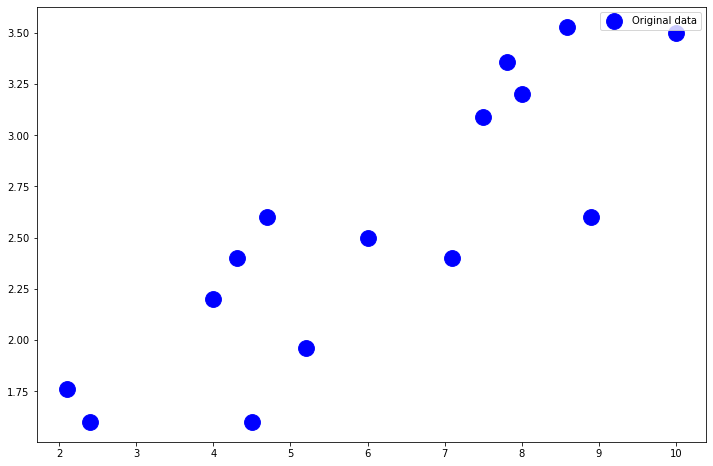

In [145]:
# Visualize the realtionship between these data

plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label='Original data', s=250, c='b')

plt.legend()


In [146]:
x_train

array([[ 4.7  ],
       [ 2.4  ],
       [ 7.5  ],
       [ 7.1  ],
       [ 4.3  ],
       [ 7.816],
       [ 8.9  ],
       [ 5.2  ],
       [ 8.59 ],
       [ 2.1  ],
       [ 8.   ],
       [10.   ],
       [ 4.5  ],
       [ 6.   ],
       [ 4.   ]], dtype=float32)

In [147]:
y_train

array([[2.6  ],
       [1.6  ],
       [3.09 ],
       [2.4  ],
       [2.4  ],
       [3.357],
       [2.6  ],
       [1.96 ],
       [3.53 ],
       [1.76 ],
       [3.2  ],
       [3.5  ],
       [1.6  ],
       [2.5  ],
       [2.2  ]], dtype=float32)

In [148]:
# Convert x and y to tensors

X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


In [149]:
X_train

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [150]:
Y_train

tensor([[2.6000],
        [1.6000],
        [3.0900],
        [2.4000],
        [2.4000],
        [3.3570],
        [2.6000],
        [1.9600],
        [3.5300],
        [1.7600],
        [3.2000],
        [3.5000],
        [1.6000],
        [2.5000],
        [2.2000]])

By default, requires_grad is not enabled. 

Declare variables to pass as the neural network parameters.

In [0]:
input_size = 1
hidden_size = 1
output_size = 1

In [152]:
# Construct the neural network manually
# w1 contains the weights for the input to the nn

w1 = torch.rand(input_size,
                hidden_size,
                
                requires_grad=True)

w1.shape

torch.Size([1, 1])

In [153]:
w1.type()

'torch.FloatTensor'

In [154]:
# w2 contains the weights from the hidden layer to the final output

w2 = torch.rand(hidden_size,
                output_size,
                
                requires_grad=True)

w2.shape

torch.Size([1, 1])

In [155]:
w2.type()
#w2.astype(float32)

#w2.set_default_dtype(torch.float64)
#torch.get_default_dtype()

'torch.FloatTensor'

In [0]:
# define learning_rate hyperparameter

learning_rate = 1e-6

The ```learning_rate``` determines that step that the model parameters take towards the optimum. When tweaking the model parameters using gradients in the backward pass we multiply the gradients by the ```learning_rate``` to determine by how much to tweak the model.

### Set up training for the NN.

In [0]:
for iter in range(1, 10):

  y_pred = X_train.mm(w1).mm(w2)
  loss = (y_pred - Y_train).pow(2).sum()

  if iter % 50 == 0:
    print(iter, loss.item())

  loss.backward()

  with torch.no_grad():
    w1 -= learning_rate * w1.grad
    w2 -= learning_rate * w2.grad
    w1.grad.zero_()
    w2.grad.zero_()

In [158]:
print('w1: ', w1) 
print('w2: ', w2)

w1:  tensor([[0.8791]], requires_grad=True)
w2:  tensor([[0.5836]], requires_grad=True)


In [159]:
# Perform predictions
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [160]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[2.4114],
        [1.2313],
        [3.8479],
        [3.6427],
        [2.2061],
        [4.0100],
        [4.5662],
        [2.6679],
        [4.4072],
        [1.0774],
        [4.1045],
        [5.1306],
        [2.3088],
        [3.0783],
        [2.0522]], grad_fn=<MmBackward>)

In [161]:
# convert predictions to numpy for visualization
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[2.4113653],
       [1.2313355],
       [3.8479235],
       [3.642701 ],
       [2.206143 ],
       [4.0100493],
       [4.566202 ],
       [2.6678934],
       [4.407155 ],
       [1.0774186],
       [4.1044517],
       [5.1305647],
       [2.308754 ],
       [3.0783389],
       [2.0522258]], dtype=float32)

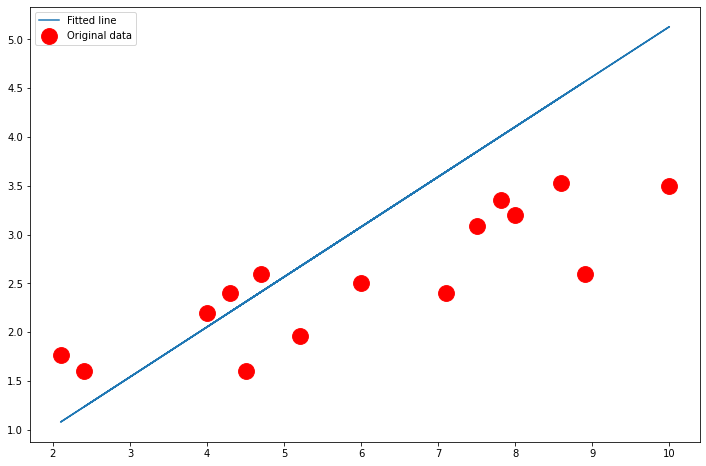

In [162]:
# visualize predictions

plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label = 'Original data', s=250, c='r')

plt.plot(x_train, predicted, label = 'Fitted line')

plt.legend()

The regression line is not very accurate and that could be because we did not train the model for more epochs. 
We can increase to 10000 and retrain. 

In [163]:
for iter in range(1, 10000):

  y_pred = X_train.mm(w1).mm(w2)
  loss = (y_pred - Y_train).pow(2).sum()

  if iter % 50 == 0:
    print(iter, loss.item())

  loss.backward()

  with torch.no_grad():
    w1 -= learning_rate * w1.grad
    w2 -= learning_rate * w2.grad
    w1.grad.zero_()
    w2.grad.zero_()

50 11.5851411819458
100 10.613763809204102
150 9.777522087097168
200 9.055935859680176
250 8.431899070739746
300 7.891162395477295
350 7.421699523925781
400 7.013408660888672
450 6.6577534675598145
500 6.347528457641602
550 6.076501369476318
600 5.839432716369629
650 5.631824970245361
700 5.4498090744018555
750 5.290050029754639
800 5.149720191955566
850 5.026336193084717
900 4.917755126953125
950 4.82213830947876
1000 4.737853527069092
1050 4.66351842880249
1100 4.597914218902588
1150 4.539984226226807
1200 4.488796234130859
1250 4.443539619445801
1300 4.403513431549072
1350 4.368096351623535
1400 4.336742877960205
1450 4.3089752197265625
1500 4.284371376037598
1550 4.262565612792969
1600 4.243230819702148
1650 4.226083755493164
1700 4.210870265960693
1750 4.197370529174805
1800 4.185386657714844
1850 4.17474365234375
1900 4.165295124053955
1950 4.156900882720947
2000 4.149441719055176
2050 4.1428141593933105
2100 4.136923789978027
2150 4.131687164306641
2200 4.127030849456787
2250 4.

In [164]:
print('w1: ', w1) 
print('w2: ', w2)

w1:  tensor([[0.8172]], requires_grad=True)
w2:  tensor([[0.4854]], requires_grad=True)


In [165]:
# Perform predictions
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [166]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.8643],
        [0.9520],
        [2.9749],
        [2.8163],
        [1.7056],
        [3.1003],
        [3.5302],
        [2.0626],
        [3.4073],
        [0.8330],
        [3.1733],
        [3.9666],
        [1.7850],
        [2.3799],
        [1.5866]], grad_fn=<MmBackward>)

In [167]:
# convert predictions to numpy for visualization
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.8642881],
       [0.951977 ],
       [2.974928 ],
       [2.816265 ],
       [1.7056254],
       [3.1002717],
       [3.530248 ],
       [2.0626168],
       [3.4072843],
       [0.8329798],
       [3.1732564],
       [3.9665709],
       [1.7849568],
       [2.3799422],
       [1.5866282]], dtype=float32)

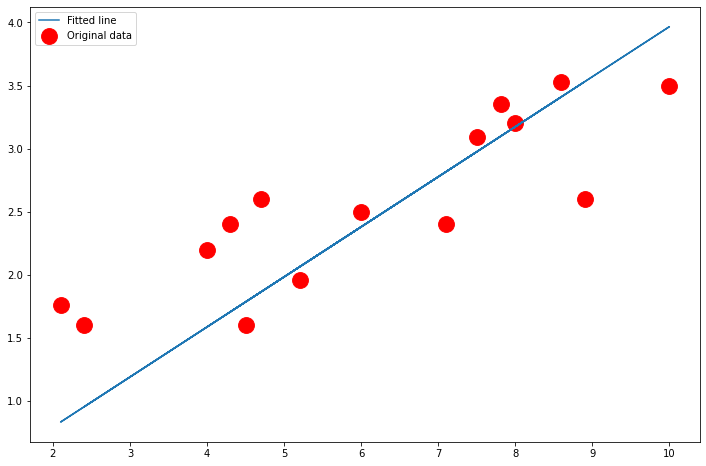

In [168]:
# visualize predictions

plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label = 'Original data', s=250, c='r')

plt.plot(x_train, predicted, label = 'Fitted line')

plt.legend()

### Computational Graphs

Pytorch computation graphs are dynamic. The graph is defined as it is executed. 

### Approaches in Computational Graphs

*   Static -- Tensorflow, symbolic programming of NNs
*   Dynamic -- Pytorch, imperative programming of NNs

### Contrasting Symbolic and Imperative Programming

**Symbolic**

*   First defined operations then execute
*   Define functions abstractily, no actual computation takes place
*   Computation explicitly compiled before evaluation
*   e.g. Java, C++

In a NN approach:

*   First defined computation then run code
*   Computation first defined using placeholders, not real data
*   Computation explicitly compiled before evaluation   
*   Results in a static computation graph

Tensorflow: *Define then Run*

*   Explicit compile step
*   Compilation converts the graph into executable format
*   Harder to program and debug
*   Less flexible -- harder to experiment
*   More restricted, computation graph only shows final results
*   More efficient -- easier to optimize

**Imperative**

*   Execution performed as operations are being defined
*   Code actually executed as the function is defined
*   No explicit compilation step before evaluation
*   e.g. Python

In a NN approach:

*   Computations are run as they are defined
*   Computations are directly performed on real tensors
*   No explicit compilation step before evaluation 
*   Results in a dynamic computation graph

Pytorch *Define by Run*

*   No explicit compile step
*   Graph already in executable format
*   Easier writing and debugging
*   More flexible, easier to experiment
*   Less restricted, intermediate results visible to users
*   Less efficient -- harder to optimize

















